# Predicting Customers for Credit validation

### Reading and Cleaning the data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
data = pd.read_csv('data_train.csv')

In [3]:
data.head()

,label,Age,Language,Sex,Marital,Has_Credit,Field,Month_of_birth,Day_of_birth,Region,Number_of_credits,Linked_cards,INPS_mln_sum,INPS_yes_no,Score_level,Score_class,Score_point,Changed_phone_number
0,0,34,1,2,6,2,13,12,1,12,1,0,0.0,0,0,0,-,1
1,0,38,1,1,5,1,10,7,1,13,1,2,0.0,0,0,0,-,1
2,0,35,1,2,4,2,9,8,1,13,4,1,1.0,1,0,0,-,1
3,0,27,1,1,5,2,13,7,1,12,1,2,1.0,0,0,0,-,1
4,0,32,1,2,4,2,10,7,1,13,3,1,2.0,1,0,0,-,1


In [4]:
data.describe()

,label,Age,Language,Sex,Marital,Has_Credit,Field,Month_of_birth,Day_of_birth,Region,Number_of_credits,Linked_cards,INPS_mln_sum,INPS_yes_no,Score_level,Score_class,Changed_phone_number
count,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000
mean,0.923050,37.690479,1.147468,1.622488,4.540829,1.032043,10.485012,6.360859,1.462157,11.207190,1.119789,1.100838,2.132932,0.957505,0.547491,1.082807,0.112094
std,0.266527,10.750031,0.354592,0.484792,1.053161,0.176125,5.597442,3.405988,0.498594,3.020191,0.366915,0.315294,2.225331,0.201726,1.190702,2.447644,0.344394
min,0.000000,19.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,29.000000,1.000000,1.000000,4.000000,1.000000,6.000000,3.000000,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,36.000000,1.000000,2.000000,4.000000,1.000000,13.000000,6.000000,1.000000,12.000000,1.000000,1.000000,1.700000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,44.000000,1.000000,2.000000,5.000000,1.000000,14.000000,9.000000,2.000000,13.000000,1.000000,1.000000,2.800000,1.000000,0.000000,0.000000,0.000000
max,1.000000,79.000000,2.000000,2.000000,7.000000,2.000000,22.000000,12.000000,2.000000,14.000000,5.000000,4.000000,86.300000,1.000000,4.000000,11.000000,3.000000


In [5]:
data.shape

(8707, 18)

In [6]:
data.isnull().sum()

label                   0
Age                     0
Language                0
Sex                     0
Marital                 0
Has_Credit              0
Field                   0
Month_of_birth          0
Day_of_birth            0
Region                  0
Number_of_credits       0
Linked_cards            0
INPS_mln_sum            0
INPS_yes_no             0
Score_level             0
Score_class             0
Score_point             0
Changed_phone_number    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8707 entries, 0 to 8706
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   label                 8707 non-null   int64  
 1   Age                   8707 non-null   int64  
 2   Language              8707 non-null   int64  
 3   Sex                   8707 non-null   int64  
 4   Marital               8707 non-null   int64  
 5   Has_Credit            8707 non-null   int64  
 6   Field                 8707 non-null   int64  
 7   Month_of_birth        8707 non-null   int64  
 8   Day_of_birth          8707 non-null   int64  
 9   Region                8707 non-null   int64  
 10  Number_of_credits     8707 non-null   int64  
 11  Linked_cards          8707 non-null   int64  
 12  INPS_mln_sum          8707 non-null   float64
 13  INPS_yes_no           8707 non-null   int64  
 14  Score_level           8707 non-null   int64  
 15  Score_class          

In [8]:
data['Score_point'] # this colums has some objects 

0         -
1         -
2         -
3         -
4         -
       ... 
8702      0
8703      0
8704      0
8705    237
8706    263
Name: Score_point, Length: 8707, dtype: object

In [9]:
df = data 

In [10]:
df = df.replace({'-':0}) # replacing the object to 0 score

In [11]:
df['Score_point']

0         0
1         0
2         0
3         0
4         0
       ... 
8702      0
8703      0
8704      0
8705    237
8706    263
Name: Score_point, Length: 8707, dtype: object

In [12]:
# converting object and other data types to interger 

columns = df.columns

for c in list(columns):
    df[c] = df[c].astype('int64')

In [13]:
df.info() # now we have only integer data type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8707 entries, 0 to 8706
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   label                 8707 non-null   int64
 1   Age                   8707 non-null   int64
 2   Language              8707 non-null   int64
 3   Sex                   8707 non-null   int64
 4   Marital               8707 non-null   int64
 5   Has_Credit            8707 non-null   int64
 6   Field                 8707 non-null   int64
 7   Month_of_birth        8707 non-null   int64
 8   Day_of_birth          8707 non-null   int64
 9   Region                8707 non-null   int64
 10  Number_of_credits     8707 non-null   int64
 11  Linked_cards          8707 non-null   int64
 12  INPS_mln_sum          8707 non-null   int64
 13  INPS_yes_no           8707 non-null   int64
 14  Score_level           8707 non-null   int64
 15  Score_class           8707 non-null   int64
 16  Score_

In [14]:
df.head()

,label,Age,Language,Sex,Marital,Has_Credit,Field,Month_of_birth,Day_of_birth,Region,Number_of_credits,Linked_cards,INPS_mln_sum,INPS_yes_no,Score_level,Score_class,Score_point,Changed_phone_number
0,0,34,1,2,6,2,13,12,1,12,1,0,0,0,0,0,0,1
1,0,38,1,1,5,1,10,7,1,13,1,2,0,0,0,0,0,1
2,0,35,1,2,4,2,9,8,1,13,4,1,1,1,0,0,0,1
3,0,27,1,1,5,2,13,7,1,12,1,2,1,0,0,0,0,1
4,0,32,1,2,4,2,10,7,1,13,3,1,2,1,0,0,0,1


<AxesSubplot:>

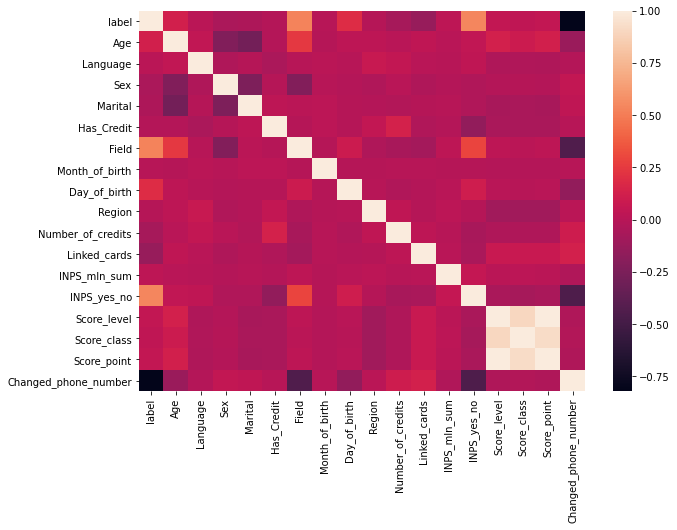

In [15]:
# checking for correlation of the columns 

plt.subplots(figsize=(10,7))
sns.heatmap(df.corr())

In [16]:
df.corr().sum()

label                   1.429268
Age                     1.266242
Language                1.041155
Sex                     0.128589
Marital                 0.278478
Has_Credit              0.779486
Field                   1.417309
Month_of_birth          0.989667
Day_of_birth            1.233809
Region                  0.860708
Number_of_credits       1.033353
Linked_cards            1.094647
INPS_mln_sum            1.145105
INPS_yes_no             1.124635
Score_level             2.811352
Score_class             2.702185
Score_point             2.829367
Changed_phone_number   -0.771510
dtype: float64

In [17]:
counting_0_1 = df.pivot_table(columns=['label'], aggfunc='size')
print(counting_0_1)

label
0     670
1    8037
dtype: int64


In [18]:
y = df['label']
X = df.drop(['label'], axis=1, inplace=False)

### as we have unbalanced data so we gonna balance it

In [19]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler 
from collections import Counter 

In [20]:
# instantiating the random over sampLer 
ros = RandomOverSampler()
 # resampLing X, y x_ros, y_
X_ros, y_ros = ros.fit_resample(X, y) 
# new class distribution
print(Counter(y_ros)) 

Counter({0: 8037, 1: 8037})


## Splitting data to train and test

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros, test_size = 0.30, random_state = 101)

In [24]:
print(X_train.shape, X_test.shape)

(11251, 17) (4823, 17)


In [25]:
print(y_train.shape, y_test.shape)

(11251,) (4823,)


# Training Data in diffirent classification Models

## SVM Classification

In [74]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC()
model.fit(X_train,y_train)
svm_pred = model.predict(X_test)

# Evaluating Model
print(accuracy_score(y_test, svm_pred).round(3))
print(confusion_matrix(y_test, Dectree_pred))
print(classification_report(y_test, Dectree_pred))


0.931
[[2396    0]
 [   6 2421]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2396
           1       1.00      1.00      1.00      2427

    accuracy                           1.00      4823
   macro avg       1.00      1.00      1.00      4823
weighted avg       1.00      1.00      1.00      4823



# Decision Tree Classification

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix 

regressor = DecisionTreeClassifier(random_state =0)
regressor.fit(X_train,y_train)
Dectree_pred = regressor.predict(X_test)

# Evaluating Model
print(accuracy_score(y_test, Dectree_pred).round(3))
print(confusion_matrix(y_test, Dectree_pred))
print(classification_report(y_test, Dectree_pred))



0.999
[[2396    0]
 [   6 2421]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2396
           1       1.00      1.00      1.00      2427

    accuracy                           1.00      4823
   macro avg       1.00      1.00      1.00      4823
weighted avg       1.00      1.00      1.00      4823



## KNearestNeighbor

In [62]:
# for this model we need scale this dataset to increase accuracy 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_trainKnn = sc.transform(X_train)
X_testKnn = sc.transform(X_test)

(4823, 17)

In [65]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_trainKnn, y_train)
knn_pred = knn.predict(X_testKnn)

# Evaluating Model
print(accuracy_score(y_test, knn_pred).round(3))
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))


0.995
[[2396    0]
 [  22 2405]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2396
           1       1.00      0.99      1.00      2427

    accuracy                           1.00      4823
   macro avg       1.00      1.00      1.00      4823
weighted avg       1.00      1.00      1.00      4823



## GradientBooster

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

print(accuracy_score(y_test, gb_pred).round(3))
print(confusion_matrix(y_test, gb_pred))
print(classification_report(y_test, gb_pred))


0.999
[[2396    0]
 [   5 2422]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2396
           1       1.00      1.00      1.00      2427

    accuracy                           1.00      4823
   macro avg       1.00      1.00      1.00      4823
weighted avg       1.00      1.00      1.00      4823



  ##  Note
   All of our model are working perfect almost near to 100%. But We choose perfect one after testing data to all of them

# Predicting new Testing Data 

In [67]:
df2 = pd.read_csv('data_test.csv')

In [68]:
df2.head()

,label,Age,Language,Sex,Marital,Has_Credit,Field,Month_of_birth,Day_of_birth,Region,Number_of_credits,Linked_cards,INPS_mln_sum,INPS_yes_no,Score_level,Score_class,Score_point,Changed_phone_number
0,0,40,1,2,4,1,0,3,1,12,2,1,2.4,1,0,0,-,1
1,0,36,2,2,4,1,0,5,1,13,1,2,0.0,1,0,0,-,1
2,0,31,1,2,4,1,0,7,1,13,1,1,0.3,0,0,0,-,2
3,0,29,1,2,4,1,0,1,1,13,1,1,0.9,1,0,0,-,1
4,0,38,1,2,4,1,0,10,1,13,1,2,4.3,0,4,2,318,1


In [69]:
df2 = df2.replace({'-':0})

In [72]:
df2['Score_point'].head()

0      0
1      0
2      0
3      0
4    318
Name: Score_point, dtype: object

In [70]:
New_Y = df2['label']
New_X = df2.drop(['label'], axis=1, inplace=False)

In [73]:
New_X.head()

,Age,Language,Sex,Marital,Has_Credit,Field,Month_of_birth,Day_of_birth,Region,Number_of_credits,Linked_cards,INPS_mln_sum,INPS_yes_no,Score_level,Score_class,Score_point,Changed_phone_number
0,40,1,2,4,1,0,3,1,12,2,1,2.4,1,0,0,0,1
1,36,2,2,4,1,0,5,1,13,1,2,0.0,1,0,0,0,1
2,31,1,2,4,1,0,7,1,13,1,1,0.3,0,0,0,0,2
3,29,1,2,4,1,0,1,1,13,1,1,0.9,1,0,0,0,1
4,38,1,2,4,1,0,10,1,13,1,2,4.3,0,4,2,318,1


# Predicting new dataset with our Models

### SVM

In [76]:
svm_new = model.predict(New_X)

# Evaluating Prediction
print(accuracy_score(New_Y, svm_new).round(3))
print(confusion_matrix(New_Y, svm_new))
print(classification_report(New_Y, svm_new))


0.896
[[26  0]
 [ 5 17]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        26
           1       1.00      0.77      0.87        22

    accuracy                           0.90        48
   macro avg       0.92      0.89      0.89        48
weighted avg       0.91      0.90      0.89        48



## Decision Tree

In [77]:
Dectree_new = regressor.predict(New_X)

# Evaluating Prediction
print(accuracy_score(New_Y, Dectree_new).round(3))
print(confusion_matrix(New_Y, Dectree_new))
print(classification_report(New_Y, Dectree_new))

1.0
[[26  0]
 [ 0 22]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        22

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



## K-Nearest Neighbors

In [79]:
sc = StandardScaler()
sc.fit(New_X)
X_trainKnn = sc.transform(New_X)


knn_pred = knn.predict(X_trainKnn)

# Evaluating Prediction
print(accuracy_score(New_Y, knn_pred).round(3))
print(confusion_matrix(New_Y, knn_pred))
print(classification_report(New_Y, knn_pred))

0.979
[[25  1]
 [ 0 22]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.96      1.00      0.98        22

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



# Gradient Booster

In [81]:
gb_pred = gb.predict(New_X)

#Evaluating Prediction
print(accuracy_score(New_Y, gb_pred).round(3))
print(confusion_matrix(New_Y, gb_pred))
print(classification_report(New_Y, gb_pred))

1.0
[[26  0]
 [ 0 22]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        22

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



# Conclusion
    Well, two of the models working perfectly! So, We can choose one of the for the implimentation 